### Покемоны

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым мы и будем работать. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Примечание**


*   В текущем анализе мы будем предполагать, что распределение характеристик нормальное, поэтому мы будем пренебрегать проверкой нормальности распределения данных, чем перед анализом "боевых" данных пренебрегать нельзя.




In [2]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

<ipython-input-3-79773de31e38>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание от профессора № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.

Выделим выборки:

In [ ]:
A = pokemon[pokemon['Class 1'] == 'Grass']
A = A[A['Class 2'] != 'Rock']['Attack']

In [5]:
B = pokemon[pokemon['Class 1'] == 'Rock']
B = B[B['Class 2'] != 'Grass']['Attack']

Визуализируем выборки:

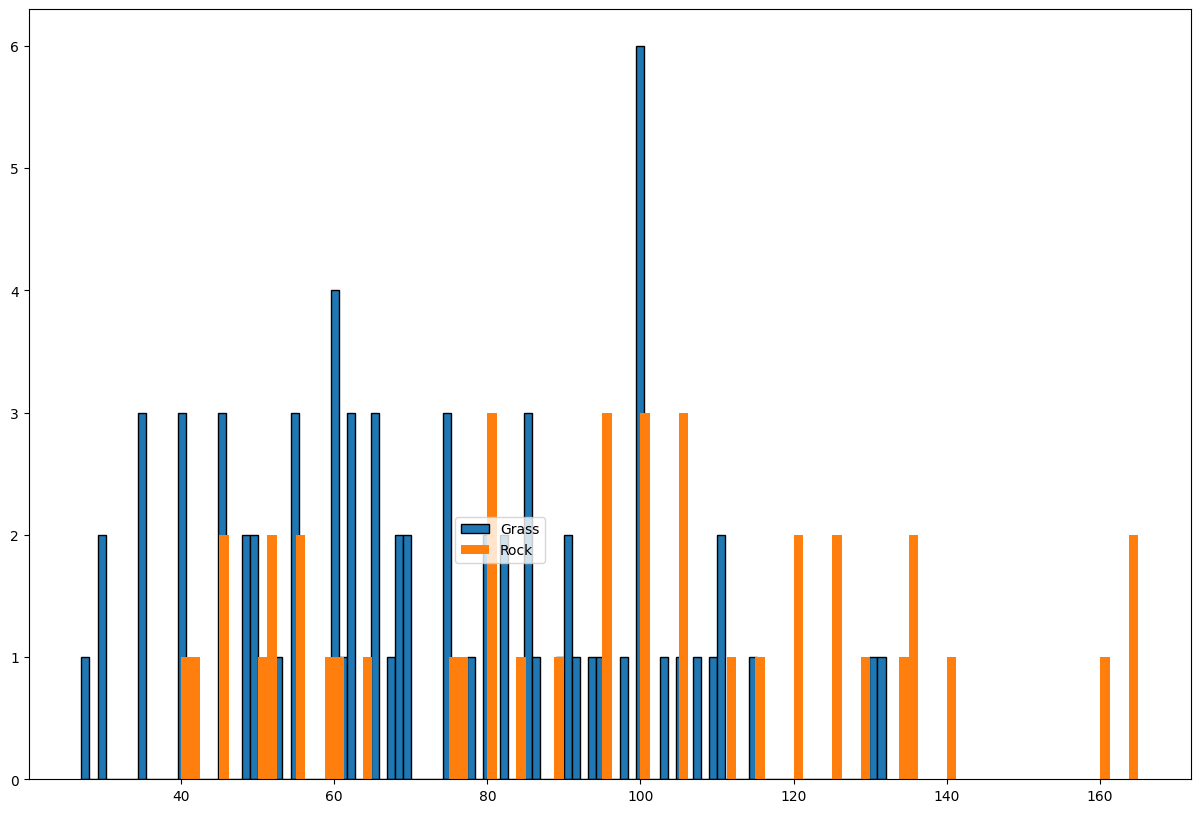

In [6]:
bins = 100
plt.figure(figsize=(15, 10))
plt.hist(A, bins=bins, alpha=1, edgecolor='black', label='Grass')
plt.hist(B, bins=bins, alpha=1, label='Rock')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

Text(0.5, 0, '')

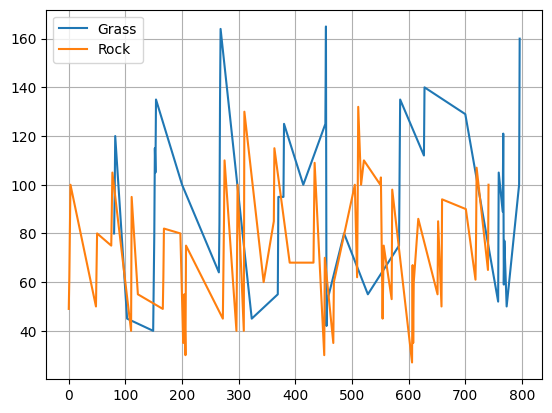

In [7]:
plt.plot(B)
plt.plot(A)
plt.grid()
plt.title('')
plt.legend(['Grass', 'Rock'])
plt.xlabel('')

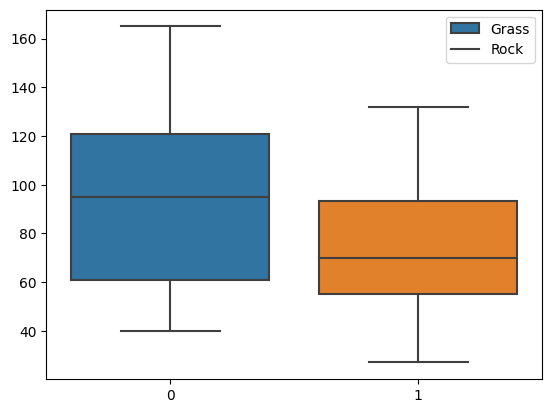

In [8]:
arr = [B,
       A]

sns.boxplot(data=arr)
plt.legend(['Grass', 'Rock'])

Приступим к самому тесту:

In [9]:
fvalue, pvalue = st.f_oneway(A, B)

print('F-value=%.3f, p-value=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

F-value=13.592, p-value=0.000354
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [10]:
stat, p = st.ttest_ind(A, B)
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу')
else:
    print('Отклоняем нулевую гипотезу')

Статистика=-3.687, p=0.0003544849
Отклоняем нулевую гипотезу


На основе исследований, можем подтвердить тот факт, что статистически покемоны класса Grass имеют большие значения атаки, нежели покемоны класса Rock.

**Задание от профессора № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`.

Проверим, прав ли он.


In [11]:
W = pokemon[pokemon['Class 1'] == 'Water']
W = W[W['Class 2'] != 'Normal']['Speed']
W.count()

112

In [12]:
N = pokemon[pokemon['Class 1'] == 'Normal']
N = N[N['Class 2'] != 'Water']['Speed']
N.count()

97

Text(0.5, 0, '')

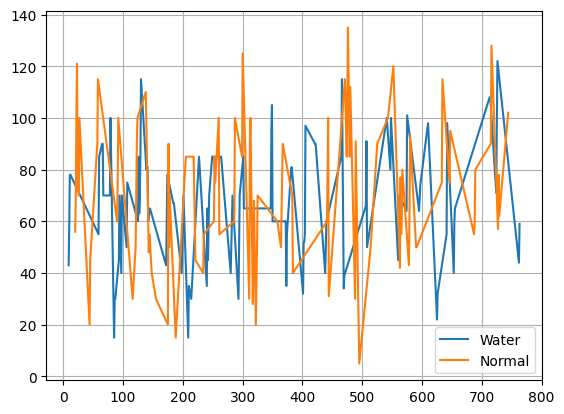

In [13]:
plt.plot(W)
plt.plot(N)
plt.grid()
plt.title('')
plt.legend(['Water', 'Normal'])
plt.xlabel('')

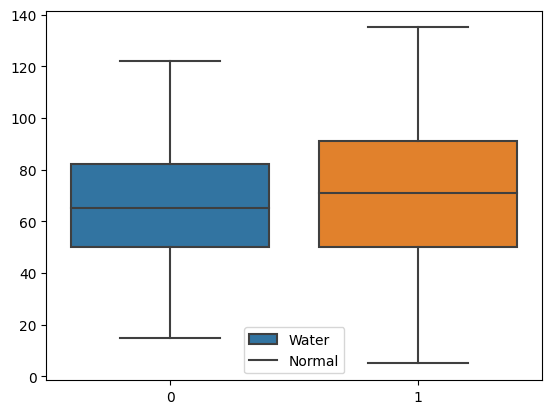

In [43]:
arr = [W,
       N]

sns.boxplot(data=arr)
plt.legend(['Water', 'Normal'])

In [14]:
fvalue, pvalue = st.f_oneway(W, N)

print('F-value=%.3f, p-value=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

F-value=2.455, p-value=0.118694
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


In [15]:
stat, p = st.ttest_ind(W, N)
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу')
else:
    print('Отклоняем нулевую гипотезу')

Статистика=-1.567, p=0.1186944476
Не отклоняем нулевую гипотезу


Выборки не отличаются, утверждение о том, что класс покемонов Water имеет большие показатели по характеристике Speed по сравнению с классом Normal, ошибочно.

**Задание от профессора № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона.
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам ('Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny').
Проверим, работает ли его сыворотка и попробуем этот факт доказать статистически.

In [16]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [17]:
TP = pokemon[pokemon['Name'].isin(treathed_pokemon)]['Speed']
TP

19     145
71     150
428    150
476    135
Name: Speed, dtype: int64

In [18]:
All = pokemon.drop(index = [19, 71, 428, 476])['Speed']

<ipython-input-19-5cce4882c88c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TP, 50)
<ipython-input-19-5cce4882c88c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(All, 50)


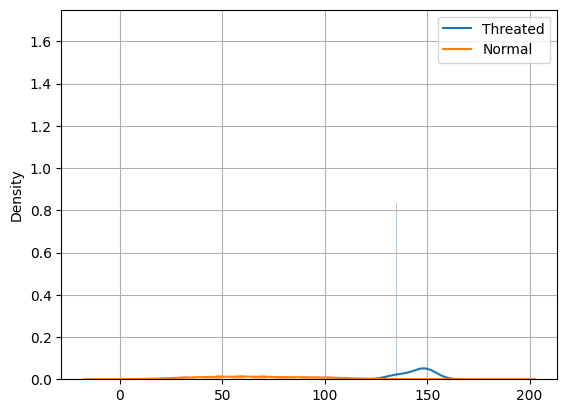

In [19]:
sns.distplot(TP, 50)
sns.distplot(All, 50)
plt.title('')
plt.legend(['Threated', 'Normal'])
plt.grid()
plt.xlabel('')
plt.show ()

Text(0.5, 0, '')

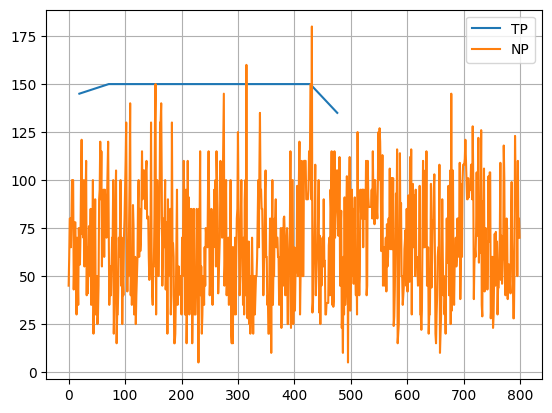

In [20]:
plt.plot(TP)
plt.plot(All)
plt.grid()
plt.title('')
plt.legend(['TP', 'NP'])
plt.xlabel('')

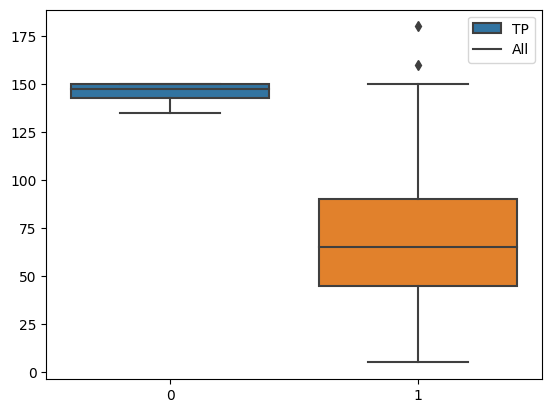

In [21]:
arr = [TP,
       All]

sns.boxplot(data=arr)
plt.legend(['TP', 'All'])

In [22]:
fvalue, pvalue = st.f_oneway(TP, All)

print('F-value=%.3f, p-value=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

F-value=29.003, p-value=0.000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [23]:
stat, p = st.ttest_ind(TP, All)
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу')
else:
    print('Отклоняем нулевую гипотезу')

Статистика=5.385, p=0.0000000952
Отклоняем нулевую гипотезу


На общей картине видно, как распределение обычных покемонов стремится к нормальному в районе 70, но покемоны под сывороткой держат уверенный результат в районе выбросов. Некоторые обыкновенные покемоны имеют более высокую скорость, однако статистика говорит, что вакцина для ускорения покемонов эффективна.

Приводить длину нормальных покемонов к treathed не вижу смысла, поскольку если в случайной выборке из 4 покемонов не окажется трех покемонов со скоростью равной или большей, чем у treathed - тест будет показывать точно такой же результат, как мы сейчас получили.

**Задание от профессора № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов.
Оук предложил разобраться в этом Вам.

Для этого решения этого задания будем использовать сумму и произведение характеристик `HP`, `Attack`, `Defense` покемонов.

In [24]:
pokemon['stats_sum'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']

In [25]:
pokemon['stats_multi'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']

In [26]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,stats_sum,stats_multi
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


In [27]:
LPS = pokemon[pokemon['Legendary'] == True]['stats_sum']
LPM = pokemon[pokemon['Legendary'] == True]['stats_multi']

In [28]:
DPS = pokemon[pokemon['Legendary'] == False]['stats_sum']
DPM = pokemon[pokemon['Legendary'] == False]['stats_multi']

<ipython-input-29-4a22378e044a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LPS, 50)
<ipython-input-29-4a22378e044a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DPS, 50)


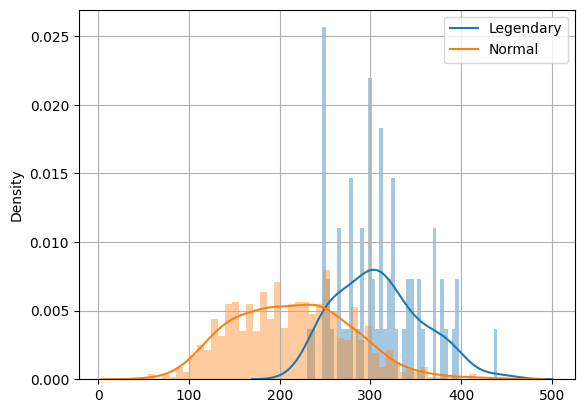

In [29]:
sns.distplot(LPS, 50)
sns.distplot(DPS, 50)
plt.title('')
plt.legend(['Legendary', 'Normal'])
plt.grid()
plt.xlabel('')
plt.show ()

<ipython-input-30-20d4ee094a6d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LPM, 50)
<ipython-input-30-20d4ee094a6d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DPM, 50)


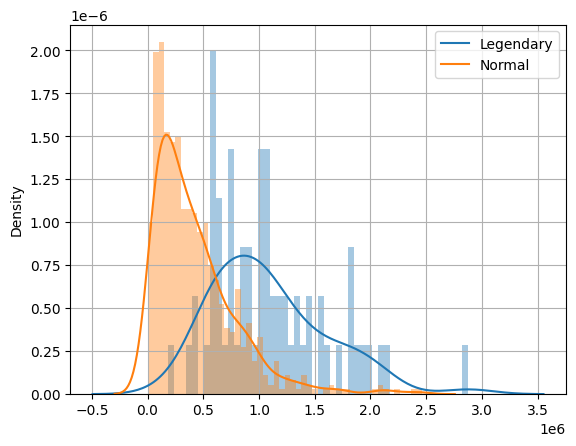

In [30]:
sns.distplot(LPM, 50)
sns.distplot(DPM, 50)
plt.title('')
plt.legend(['Legendary', 'Normal'])
plt.grid()
plt.xlabel('')
plt.show ()

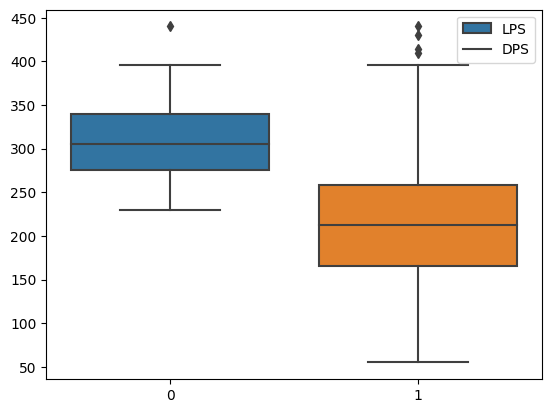

In [31]:
arr = [LPS,
       DPS]

sns.boxplot(data=arr)
plt.legend(['LPS', 'DPS'])

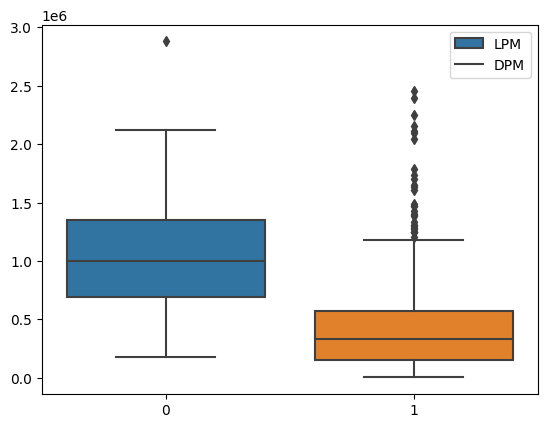

In [32]:
arr = [LPM,
       DPM]

sns.boxplot(data=arr)
plt.legend(['LPM', 'DPM'])

In [33]:
fvalue, pvalue = st.f_oneway(LPS, DPS)

print('F-value=%.3f, p-value=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

F-value=134.371, p-value=0.000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [34]:
fvalue, pvalue = st.f_oneway(LPM, DPM)

print('F-value=%.3f, p-value=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

F-value=175.914, p-value=0.000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [35]:
stat, p = st.ttest_ind(LPS, DPS)
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу')
else:
    print('Отклоняем нулевую гипотезу')

Статистика=11.592, p=0.0000000000
Отклоняем нулевую гипотезу


In [36]:
stat, p = st.ttest_ind(LPM, DPM)
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу')
else:
    print('Отклоняем нулевую гипотезу')

Статистика=13.263, p=0.0000000000
Отклоняем нулевую гипотезу


Можно говорить о том, что легендарные покемоны в среднем обладают более высокими показателями `HP`, `Attack` и `Defense` чем их не легендарные товарищи - средние значения по легендарным покемонам находятся выше.

**Задание от профессора Оука № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил четыре класса ( `Rock`, `Ground`,`Steel`,`Ice`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверим, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо.

In [37]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [38]:
rock = pokemon[pokemon['Class 1'] == 'Rock']['Defense']
ground = pokemon[pokemon['Class 1'] == 'Ground']['Defense']
steel = pokemon[pokemon['Class 1'] == 'Steel']['Defense']
ice = pokemon[pokemon['Class 1'] == 'Ice']['Defense']

In [39]:
print(rock.count(),
      ground.count(),
      steel.count(),
      ice.count())

44 32 27 24


<ipython-input-40-a9b0b6889510>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rock, 50)
<ipython-input-40-a9b0b6889510>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ground, 50)
<ipython-input-40-a9b0b6889510>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in sea

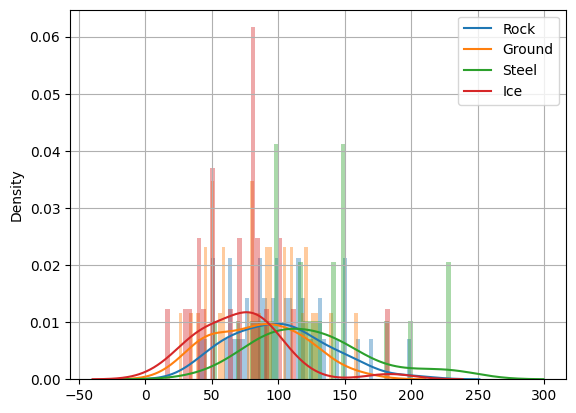

In [40]:
sns.distplot(rock, 50)
sns.distplot(ground, 50)
sns.distplot(steel, 50)
sns.distplot(ice, 50)
plt.title('')
plt.legend(best_defence_class)
plt.grid()
plt.xlabel('')
plt.show ()

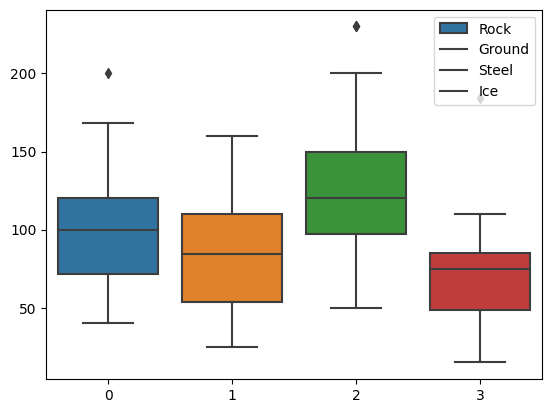

In [41]:
all_arr = [rock,
           ground,
           steel,
           ice]

sns.boxplot(data=all_arr)
plt.legend(['Rock', 'Ground','Steel','Ice'])

In [42]:
stat, p = st.kruskal(rock, ground, steel, ice)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 26.129, p = 0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


Можем говорить о том, что покемоны класса `Steel` в среднем имеют более лучшие показатели брони по сравнению с другими сравниваемыми классами.